In [1]:
# importing all the necessary libraries Following are automatically imported by Pulsar Analysis

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


from scipy.signal import welch, correlate, find_peaks
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
from generic_plotting import *
from pulsar_analysis import pulsar_analysis
#%autoreload 1

In [3]:

# # I will have a set of functions which can work independently thne the pulsar class will be used to  
# # call these functions and do the analysis on the pulsar data file.


# class PulsarAnalysis:
#     # No import needed; use static methods directly from Fn_1ch, e.g., Fn_1ch.compute_channel_intensity_matrix

#     def __init__(self, file_path, data_type=None, channel_names = None,center_freq_MHZ = 326.5,bandwidth_MHZ = 16.5 ,n_channels=2,block_size=512, avg_blocks=60, sample_rate=33e6):
#         self.file_path = file_path
#         self.data_type = data_type

#         self.n_channels = n_channels
#         self.raw_data = None
#         #self.intensity_matrix_ch_s = None
#         self.channel_names = channel_names        
#         self.block_size = block_size
#         self.avg_blocks = avg_blocks
#         self.sample_rate = sample_rate  # in Hz
#         self.intensity_matrix_ch_s = np.array([])
#         self.dedispersed_ch_s = np.array([])
#         self.center_freq_MHZ = center_freq_MHZ
#         self.bandwidth_MHZ = bandwidth_MHZ
#         self.pulseperiod_ms = None
#         self.dedispersion_measure = None

#         self.load_data()  # Automatically load data upon object creation
#         for k, v in vars(self).items():
#             if k in ['raw_data', 'intensity_matrix_ch_s', 'dedispersed_ch_s']:
#                 print(f"\033[1;34m{k}\033[0m shape :  {v.shape if isinstance(v, np.ndarray) else v}")
#             else:
#                 print(f"\033[1;31m{k}\033[0m: {v}")


#         if self.channel_names == None or self.n_channels != len(self.channel_names):
#             print("No of given channels names and in data didn't match")
#             self.channel_names = [f"ch{i}" for i in range(0, self.n_channels )]
        
#         # if self.n_channels != n_channels:
#         #     print("No of given channels and in data didnt match")
#         #     self.intensity_matrix_ch_s = np.zeros(self.n_channels)
#         #self.intensity_matrix_ch_s = None


#     def load_data(self):
#         if self.data_type == 'ascii':
#             self.raw_data = np.loadtxt(self.file_path)
#         elif self.data_type == 'binary':
#             self.raw_data = np.fromfile(self.file_path, dtype=np.int32).reshape(-1, self.n_channels)
#             #self.raw_data = temp_data[~np.isnan(temp_data).any(axis=1)]
#         else:
#             raise ValueError("Unsupported data type. Use 'ascii' or 'binary'.")

#         print(f"Given Data is of ndim : {self.raw_data.ndim} . shape : {self.raw_data.shape[1]}")
#         self.n_channels = self.raw_data.shape[1]

#     def compute_intensity_matrix(self):
#         if self.raw_data is None or self.n_channels is None:
#             raise ValueError("Data not loaded. Please call load_data() first.")
#         Intensity_Matrix = []
#         for i in range(self.n_channels):
#             channel_data = self.raw_data[:, i]
#             Intensity_Matrix.append(compute_channel_intensity_matrix(
#                 channel_data, self.block_size, self.avg_blocks, self.sample_rate
#             ))
#         self.intensity_matrix_ch_s = Intensity_Matrix
#         self.dedispersed_ch_s = np.empty_like(Intensity_Matrix)

#     def Auto_dedisperse(self,channel,num_peaks,to_plot,dm_min, dm_max,tol = 1):
#         matrix = self.intensity_matrix_ch_s[channel]
#         center_freq_MHZ = self.center_freq_MHZ
#         bandwidth_MHZ = self.bandwidth_MHZ
#         sample_rate = self.sample_rate
#         block_size = self.block_size
#         avg_blocks = self.avg_blocks
#         num_peaks = num_peaks
#         tol = tol
#         pulseperiod_ms = self.pulseperiod_ms

#         if pulseperiod_ms is None:
#             raise ValueError("Pulse period not set. Please set pulse period before dedispersing.")
#         if dm_min is None or dm_max is None:
#             raise ValueError("DM range not set. Please set dm_min and dm_max before dedispersing.")
#         if matrix is None:
#             raise ValueError("Intensity matrix for the channel is not computed. Please compute intensity matrix first.")

#         dm = find_best_dm_Grid(matrix, center_freq_MHZ,bandwidth_MHZ, sample_rate, block_size, avg_blocks,num_peaks,pulseperiod_ms, to_plot, dm_min, dm_max, tol)
#         self.dedispersion_measure = dm

#     def Manual_dedisperse(self,channel,DM):
#         matrix = self.intensity_matrix_ch_s[channel]
#         dedispersed = dedisperse(matrix, DM,block_size=self.block_size, avg_blocks=self.avg_blocks
#                     , sample_rate=self.sample_rate , bandwidth_MHZ = self.bandwidth_MHZ ,center_freq_MHZ = self.center_freq_MHZ)
#         self.dedispersed_ch_s[channel] = dedispersed
#         self.dedispersion_measure = DM



        
        


In [4]:
# Initialize and run the analysis
long_data = "./Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt"
short_data = "/home/ashwin-ubuntu/GIT/Vela_Data_analysis/Analysis/vela_chunks/chunk_0001.txt"

vela = pulsar_analysis(long_data, channel_names=["N", "S"], data_type='ascii')


Given Data is of ndim : 2 . shape : 2
file_path: ./Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt
data_type: ascii
n_channels: 2
raw_data shape :  (30720000, 2)
channel_names: ['N', 'S']
block_size: 512
avg_blocks: 60
sample_rate: 33000000.0
intensity_matrix_ch_s shape :  (0,)
dedispersed_ch_s shape :  (0,)
center_freq_MHZ: 326.5
bandwidth_MHZ: 16.5
pulseperiod_ms: None
dedispersion_measure: None


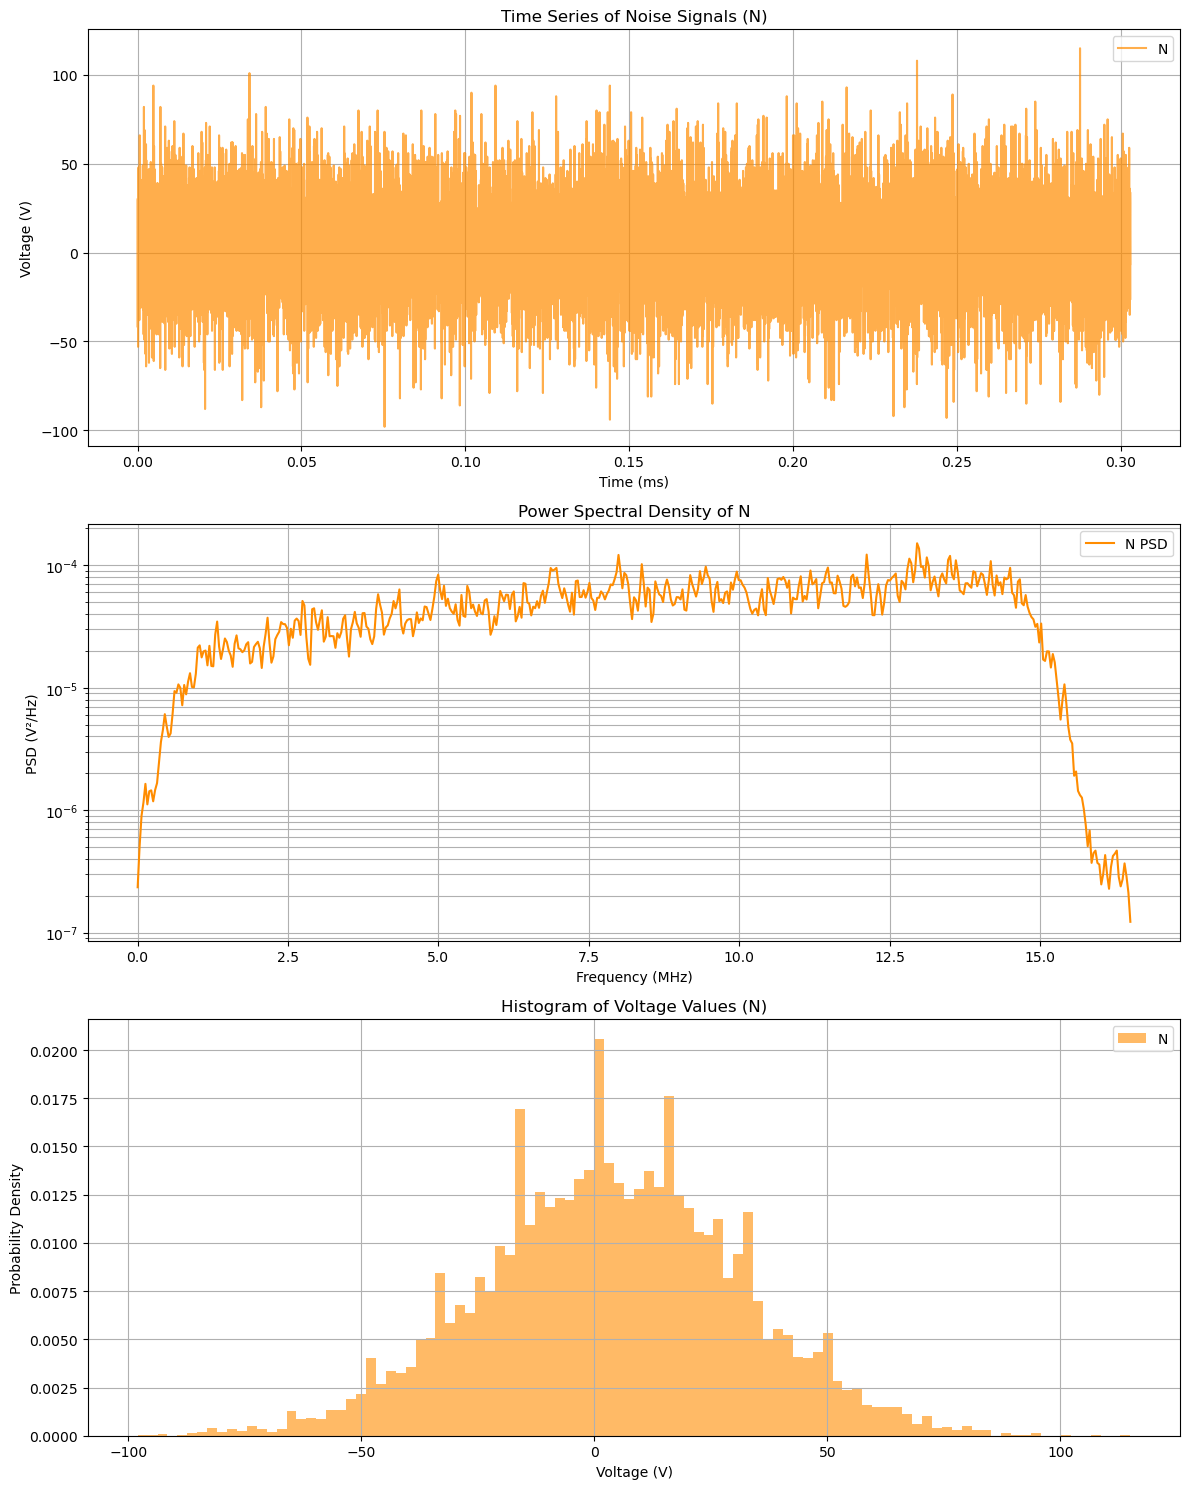

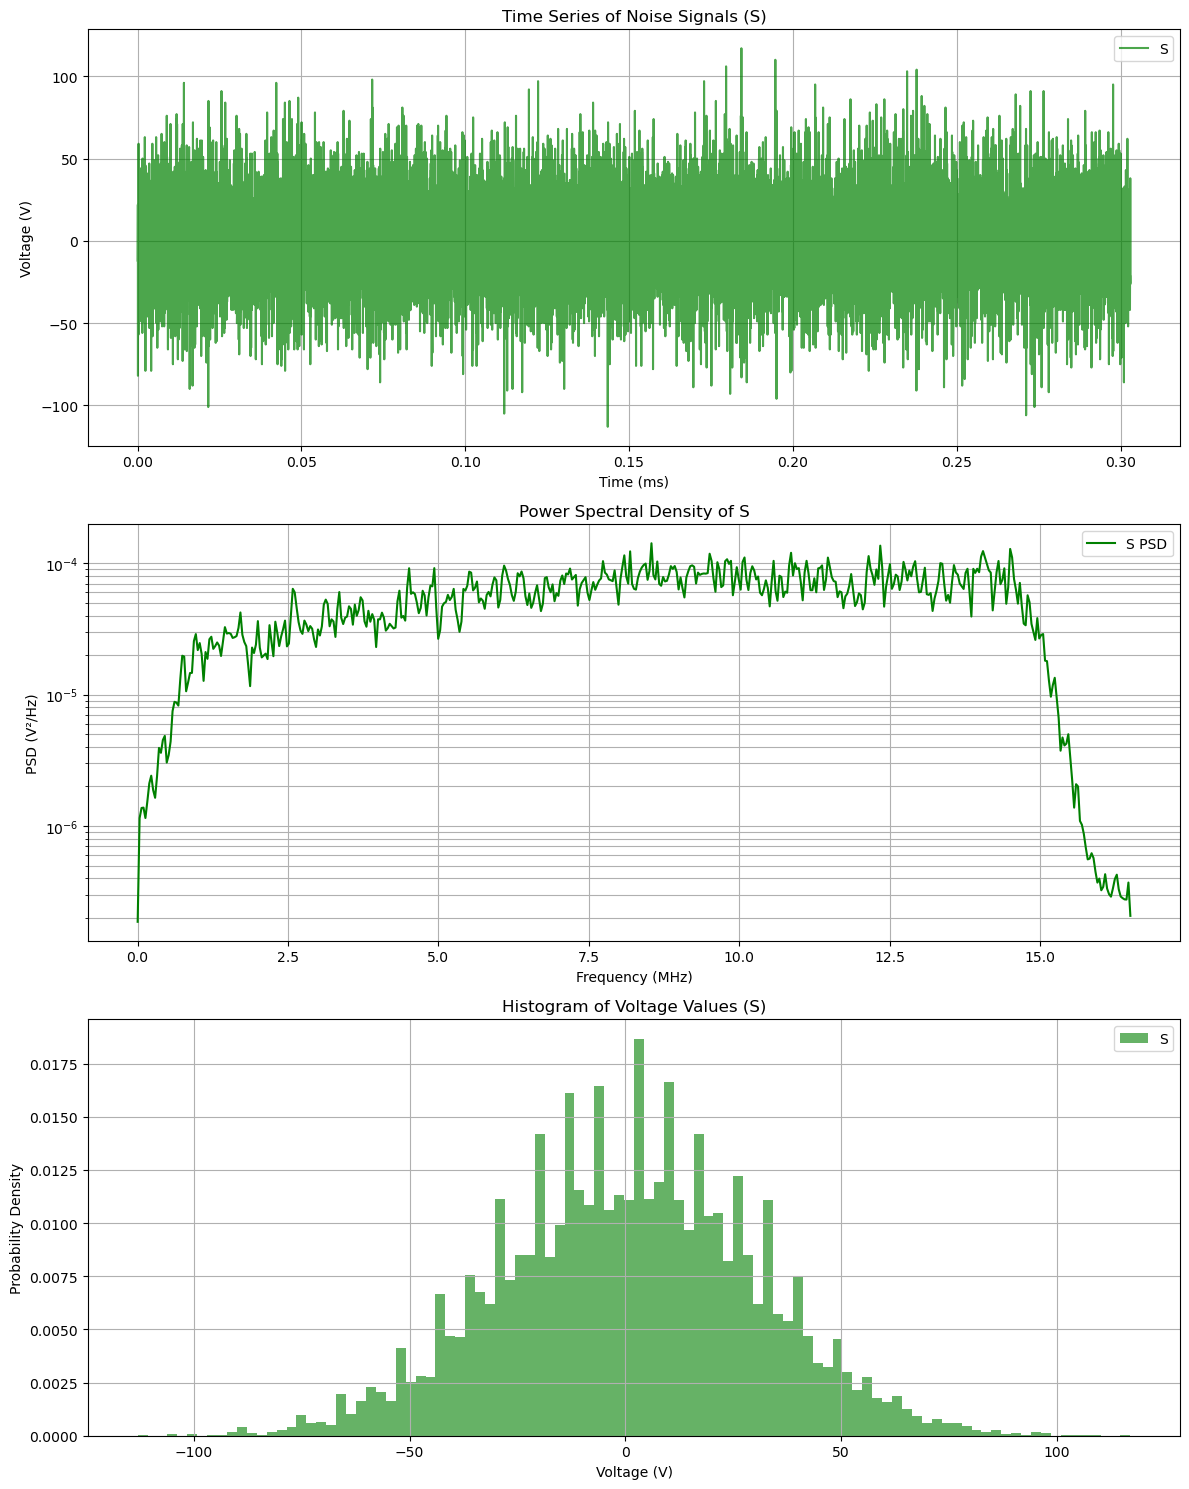

In [5]:
Plot_characterstics(vela,channel=0)
Plot_characterstics(vela,channel=1)

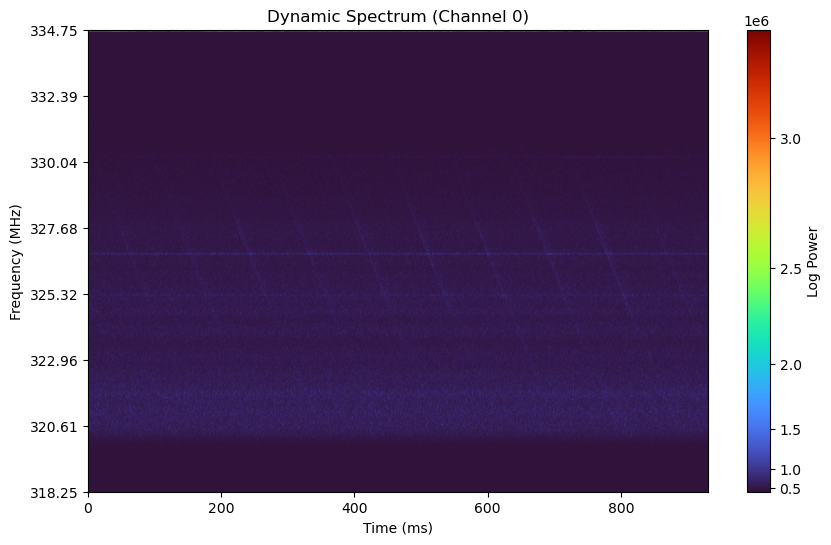

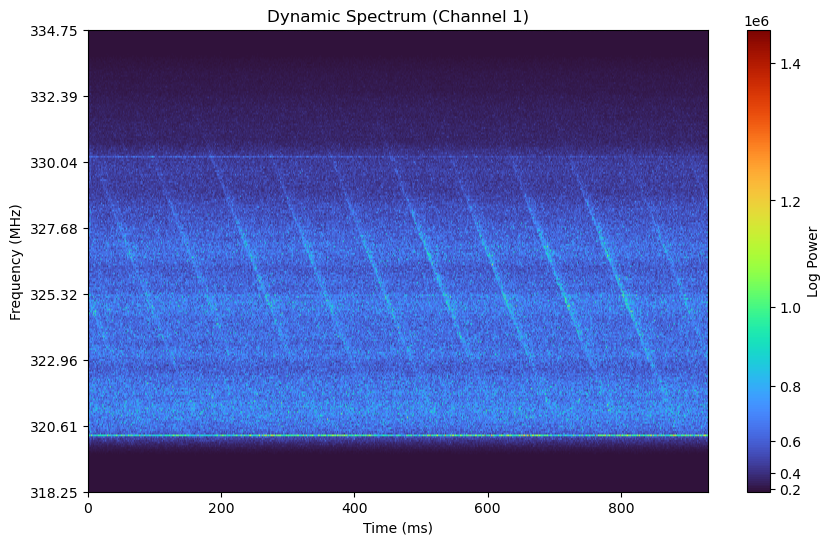

In [6]:
vela.compute_intensity_matrix()
plot_intensity_matrix(vela,channel = 0)
plot_intensity_matrix(vela,channel = 1)

Top 3 peak positions (ms): [ 88.43636364 177.80363636 269.03272727]


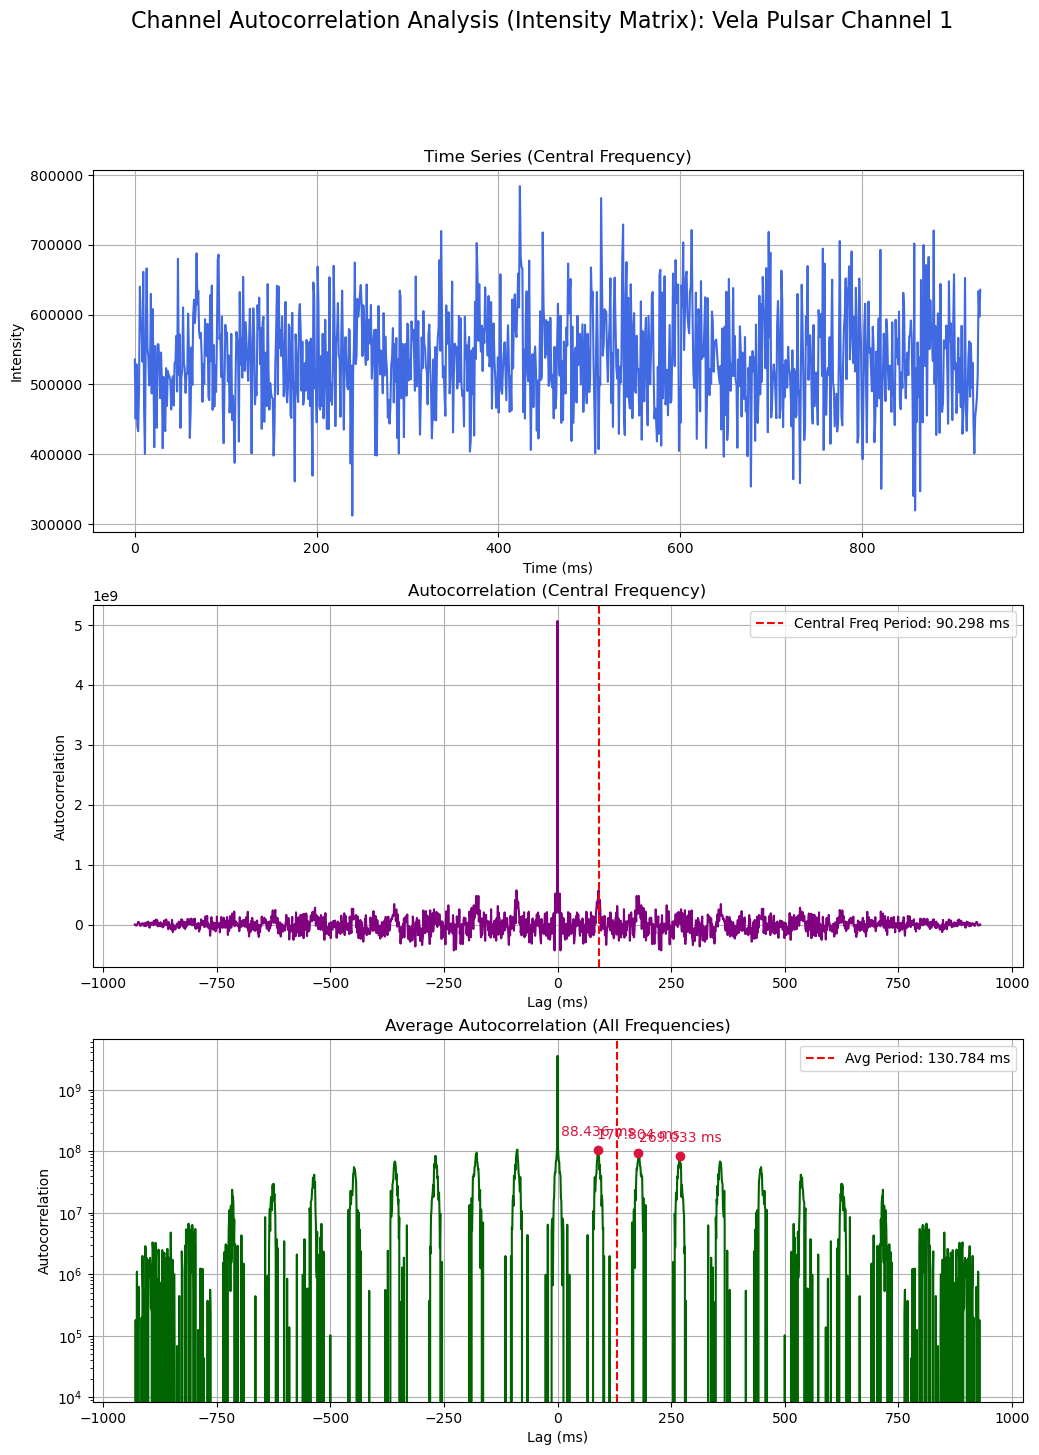

Top 3 peak positions (ms): [ 89.36727273 179.66545455 269.03272727]


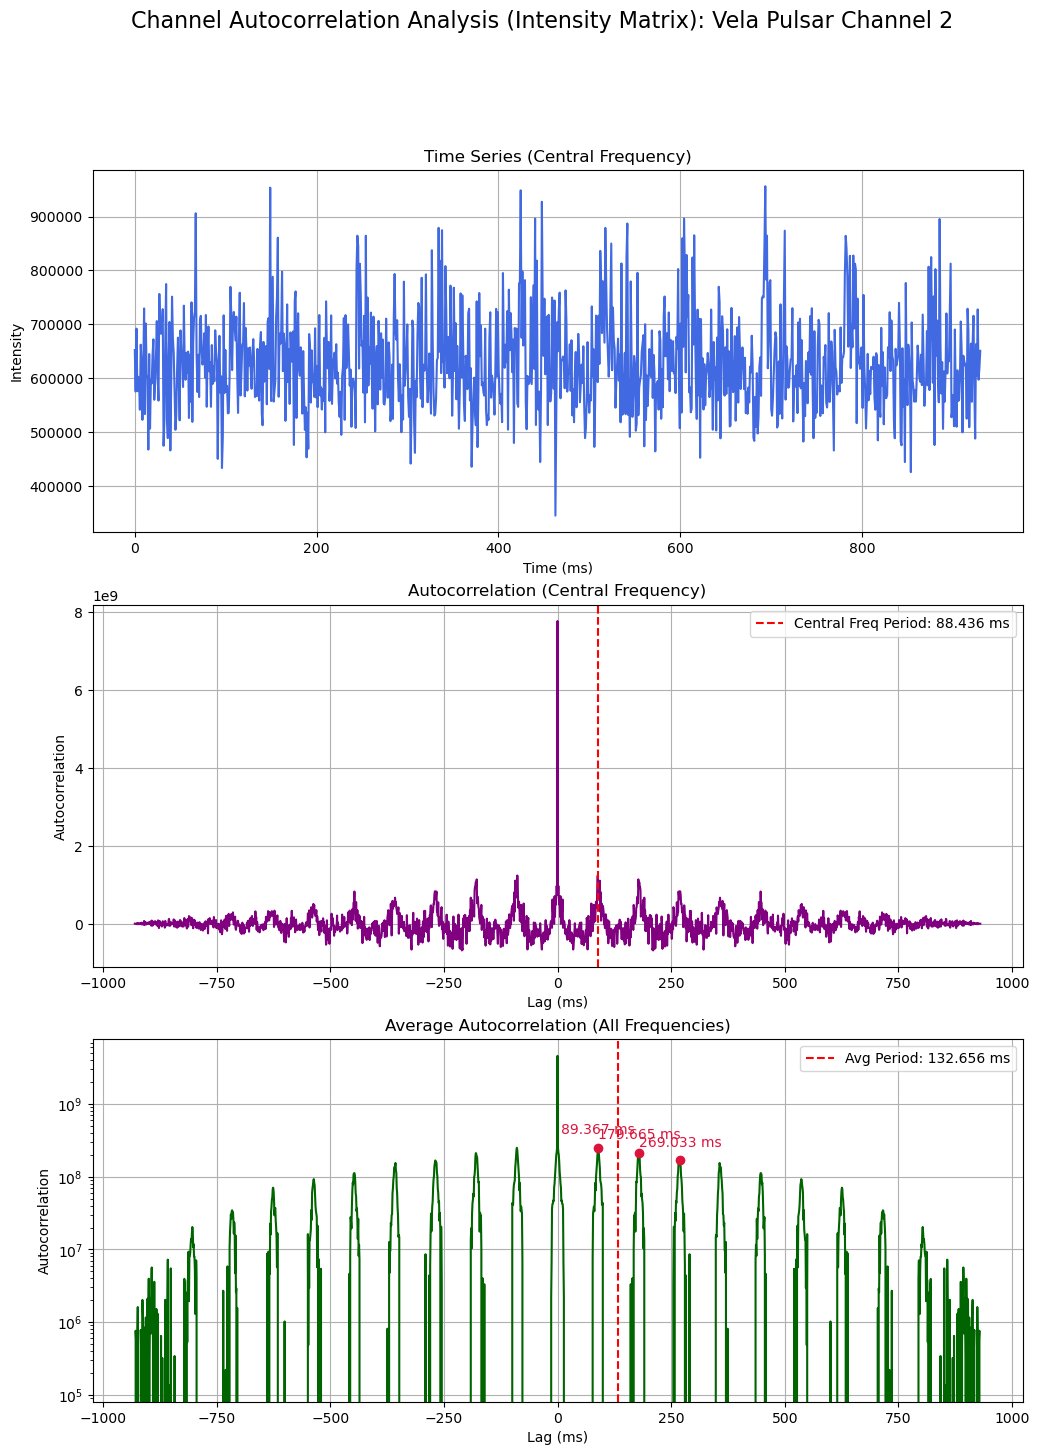

In [7]:
analyze_autocorrelation(vela,channel=0, label="Vela Pulsar Channel 1")
analyze_autocorrelation(vela,channel=1, label="Vela Pulsar Channel 2")


In [8]:
# Set pulsar Period
vela.pulseperiod_ms = 89.3673

DM = 40.0 ; score = 894058.8355
DM = 41.0 ; score = 143771.1281
DM = 42.0 ; score = 149011.2544
DM = 43.0 ; score = 152799.8050
DM = 44.0 ; score = 168048.8429
DM = 45.0 ; score = 168259.4125
DM = 46.0 ; score = 186174.5223
DM = 47.0 ; score = 189882.1593
DM = 48.0 ; score = 233532.3428
DM = 49.0 ; score = 239106.8838
DM = 50.0 ; score = 253127.2957
DM = 51.0 ; score = 243477.9980
DM = 52.0 ; score = 290988.2043
DM = 53.0 ; score = 326789.0126
DM = 54.0 ; score = 361326.9675
DM = 55.0 ; score = 358621.5480
DM = 56.0 ; score = 393227.8871
DM = 57.0 ; score = 429771.3138
DM = 58.0 ; score = 471472.2780
DM = 59.0 ; score = 542178.4490
DM = 60.0 ; score = 593665.4676
DM = 61.0 ; score = 735195.4484
DM = 62.0 ; score = 894210.3760
DM = 63.0 ; score = 883843.8123
DM = 64.0 ; score = 1010816.2709
DM = 65.0 ; score = 1176575.6901
DM = 66.0 ; score = 1322772.9737
DM = 67.0 ; score = 1307001.0975
DM = 68.0 ; score = 1988705.6736
DM = 69.0 ; score = 2198594.3060
DM = 70.0 ; score = 1985537.6304
D

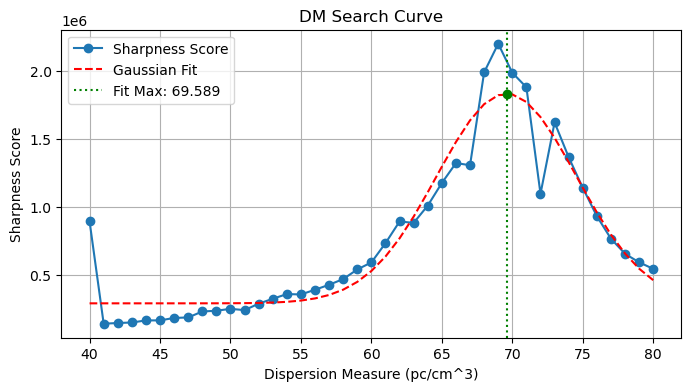

DM = 40.0 ; score = 156355.0081
DM = 41.0 ; score = 148487.8779
DM = 42.0 ; score = 1245947.8167
DM = 43.0 ; score = 153676.1837
DM = 44.0 ; score = 173840.3830
DM = 45.0 ; score = 182859.9341
DM = 46.0 ; score = 187190.1329
DM = 47.0 ; score = 1607741.7601
DM = 48.0 ; score = 226235.3851
DM = 49.0 ; score = 258784.5717
DM = 50.0 ; score = 256369.1434
DM = 51.0 ; score = 282966.9730
DM = 52.0 ; score = 303480.9903
DM = 53.0 ; score = 322761.5932
DM = 54.0 ; score = 341971.0989
DM = 55.0 ; score = 386962.0171
DM = 56.0 ; score = 421978.1732
DM = 57.0 ; score = 500802.1000
DM = 58.0 ; score = 581378.5242
DM = 59.0 ; score = 624535.4707
DM = 60.0 ; score = 703214.4960
DM = 61.0 ; score = 824999.2479
DM = 62.0 ; score = 1000768.6799
DM = 63.0 ; score = 1208400.6088
DM = 64.0 ; score = 1446858.4223
DM = 65.0 ; score = 1709929.7776
DM = 66.0 ; score = 2152860.1944
DM = 67.0 ; score = 2327258.6268
DM = 68.0 ; score = 2833505.2728
DM = 69.0 ; score = 3574984.5081
DM = 70.0 ; score = 3025329.23

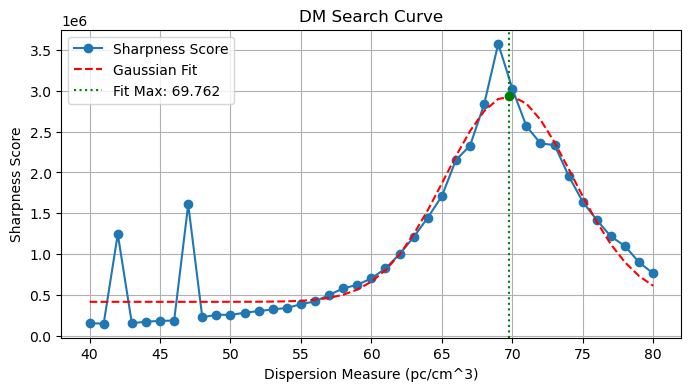

In [11]:
channel = 0
num_peaks = 10
to_plot = False
dm_min = 40.0
dm_max = 80.0
tol = 1

vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)

channel = 1
vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)



DM = 65.0 ; score = 1176575.6901
DM = 65.2 ; score = 1188327.6505
DM = 65.4 ; score = 1233729.2213
DM = 65.6 ; score = 1249626.8574
DM = 65.8 ; score = 1110919.3333
DM = 66.0 ; score = 1322772.9737
DM = 66.2 ; score = 1157249.4706
DM = 66.4 ; score = 1203133.8138
DM = 66.6 ; score = 1252688.2762
DM = 66.8 ; score = 1274817.0163
DM = 67.0 ; score = 1307001.0975
DM = 67.2 ; score = 1051116.9717
DM = 67.4 ; score = 1429128.1133
DM = 67.6 ; score = -261391.7523
DM = 67.8 ; score = 1974036.7054
DM = 68.0 ; score = 1988705.6736
DM = 68.2 ; score = 1817461.0935
DM = 68.4 ; score = 2298287.5466
DM = 68.6 ; score = 2059343.7887
DM = 68.8 ; score = 1836004.0864
DM = 69.0 ; score = 2198594.3060
DM = 69.2 ; score = 2193001.0590
DM = 69.4 ; score = 1920346.4801
DM = 69.6 ; score = 1653743.2207
DM = 69.8 ; score = 1617505.7414
DM = 70.0 ; score = 1985537.6304
DM = 70.2 ; score = 1696951.1268
DM = 70.4 ; score = 1708877.5597
DM = 70.6 ; score = 1757834.5149
DM = 70.8 ; score = 1746756.6440
DM = 71.0 

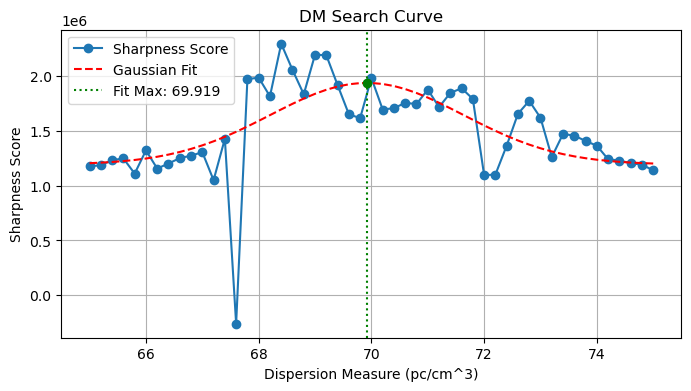

DM = 65.0 ; score = 1709929.7776
DM = 65.2 ; score = 1788021.4463
DM = 65.4 ; score = 1864941.6749
DM = 65.6 ; score = 1919372.9924
DM = 65.8 ; score = 2016374.0624
DM = 66.0 ; score = 2152860.1944
DM = 66.2 ; score = 2221978.5007
DM = 66.4 ; score = 2143486.6445
DM = 66.6 ; score = 2226914.6838
DM = 66.8 ; score = 2515338.7944
DM = 67.0 ; score = 2327258.6268
DM = 67.2 ; score = 2545758.0597
DM = 67.4 ; score = 2563721.1854
DM = 67.6 ; score = 2651081.8118
DM = 67.8 ; score = 2762308.9707
DM = 68.0 ; score = 2833505.2728
DM = 68.2 ; score = 2902452.6357
DM = 68.4 ; score = 2999508.3937
DM = 68.6 ; score = 2963853.7479
DM = 68.8 ; score = 3040095.7230
DM = 69.0 ; score = 3574984.5081
DM = 69.2 ; score = 2991955.9147
DM = 69.4 ; score = 2781301.4320
DM = 69.6 ; score = 3075886.9697
DM = 69.8 ; score = 3044603.7418
DM = 70.0 ; score = 3025329.2367
DM = 70.2 ; score = 3217012.5341
DM = 70.4 ; score = 3044357.2272
DM = 70.6 ; score = 2722655.5744
DM = 70.8 ; score = 2598538.2411
DM = 71.0 

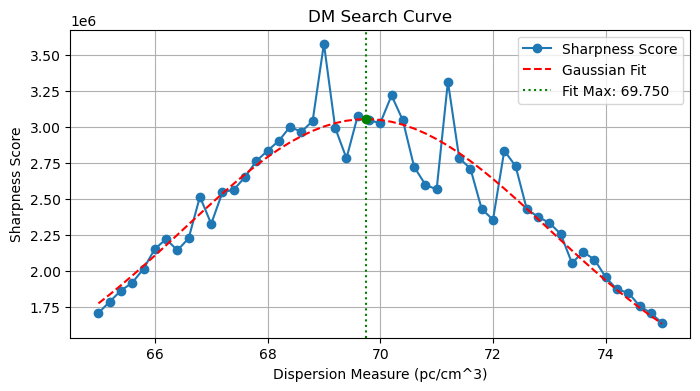

In [12]:
channel = 0
num_peaks = 10
to_plot = False
dm_min = 65.0
dm_max = 75.0
tol = 0.2

vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)

channel = 1
vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)



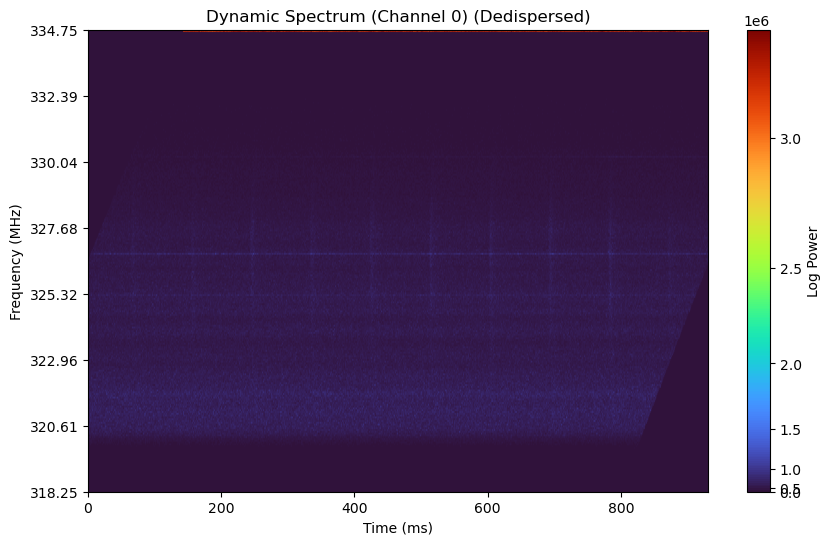

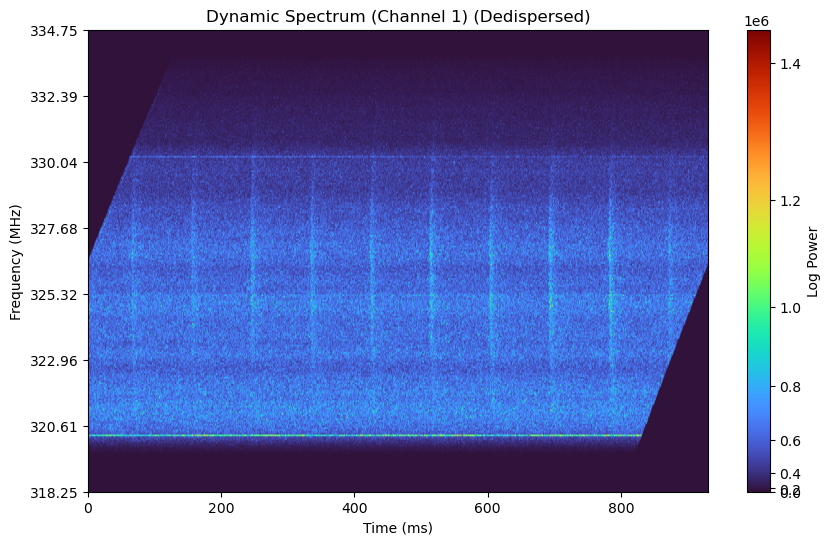

In [14]:
# give integer for a single channel or String "all" for all channels
vela.dedispersion_measure = 69.750

best_DM = vela.dedispersion_measure
channel = 0

vela.Manual_dedisperse(DM=best_DM, channel="all")
plot_intensity_matrix(vela,channel ,dedispersed=True)

channel = 1
plot_intensity_matrix(vela,channel,dedispersed=True)